### Ananlyse en composantes principales (ACP) : 
 - Combien de facteurs ? et comment
 - impact sur la classification ?


#### Charger les données : 
On commence par charger le dataset :

In [5]:
import numpy as np
from sklearn.datasets import load_wine
wine = load_wine()
print(wine.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


In [6]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [7]:
X = wine.data
X.shape

(178, 13)

In [8]:
y = wine.target
print(np.unique(y))

[0 1 2]


In [9]:
print(wine.target_names)

['class_0' 'class_1' 'class_2']


In [10]:
print(wine.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


#### On récapitule : 
- Il y a 178 instances. 
- Le nombre de features est de 13. 
- Chacune des instances appartient soit à la classe 0, 1 ou 2.

<hr>

#### Pré-traitement des données : 

On centre et on réduit les données initiales :

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
z = scaler.fit_transform(X)

### Et on fait notre ACP :

In [12]:
from sklearn.decomposition import PCA
pca = PCA()
print(pca)

PCA()


In [13]:
pca.fit_transform(z)

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [14]:
print(pca.n_components_)

13


Par défaut, l'ACP crée autant de composantes que de variables initiales :

In [15]:
print(pca.explained_variance_)

[4.73243698 2.51108093 1.45424187 0.92416587 0.85804868 0.64528221
 0.55414147 0.35046627 0.29051203 0.25232001 0.22706428 0.16972374
 0.10396199]


Et on a donc 100% de la variabilité qui est expliquée (bon c'est 99,99% mais bon ...)

In [16]:
print(pca.explained_variance_ratio_.sum())

0.9999999999999999


On peut récupérer l'ensemble des valeurs propres (on se rappelle que les valeurs propres ne sont autre que les variances des axes) : 

In [17]:
eigval = pca.explained_variance_
p = X.shape[1]

On dessine alors l'eboulie des valeurs propres :  

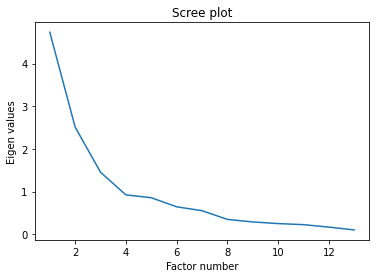

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#scree plot
plt.plot(np.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

pour voir que, si on applique le critère du coude, on devrait garder 4 axes :  

In [19]:
n_components = 4
pca = PCA(n_components=n_components)
pca_wine = pca.fit_transform(z)
total_variance = pca.explained_variance_ratio_.sum()
print('Total Explained Variance: ', total_variance)
print(pca_wine.shape)

Total Explained Variance:  0.735989990758993
(178, 4)


ce qui permet de garder plus que 73% de variance totale.

Néanmonoins, si on veut pouvoir visualiser les données, il ne faut gardet que deux axes :

In [20]:
n_components = 2
pca = PCA(n_components=n_components)
pca_wine = pca.fit_transform(z)
total_variance = pca.explained_variance_ratio_.sum()
print('Total Explained Variance: ', total_variance)
print(pca_wine.shape)

Total Explained Variance:  0.5540633835693534
(178, 2)


Et on se pose la question de savoir si on perd en classification ... On affiche alors le nuage de points :

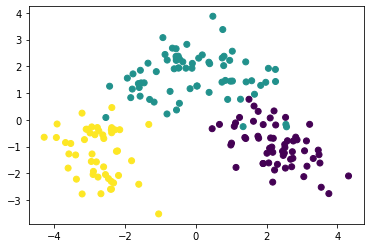

In [21]:
plt.scatter(pca_wine[:, 0], pca_wine[:, 1], c=y)

et on voit que les classes sont bien séparables ...